<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Logo_DuocUC.svg/2560px-Logo_DuocUC.svg.png' width=50%, height=20%>

# FASE 1: COMPRENDER EL NEGOCIO

### Valve Corporation, es una empresa de desarrollo de videojuegos importante, que ha logrado un éxito significativo con su franquicia de Counter-Strike. Valve necesita saber cuales son las posibilidades y probabilidades que ocurran en el videojuego, ya que cada partida tiene un ritmo o estilo diferente.

### 1- Probabilidad de victoria por equipo en un mapa específico:
Utilizando características como el mapa jugado y las estadísticas del equipo, se puede conocer la probabilidad de que los terroristas o los antiterroristas ganen más rondas en un mapa específico. Esto proporcionaría información útil para los jugadores sobre las fortalezas y debilidades de cada equipo en diferentes entornos de juego.

### 2- El valor de equipamiento inicial tiene una relación con la cantidad de asesinatos por ronda?

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
#cargar anexo

df = pd.read_csv('Anexo ET_demo_round_traces.csv', sep=";")

/tmp/ipykernel_108/375127549.py:3: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Anexo ET_demo_round_traces.csv', sep=";")


# Fase 2: Comprender los datos

---

-Se recomienda obtener estadísticos descriptivos para apoyar hipótesis inferenciales.
-Reconocer la naturaleza de los datos y como tratarlos en etapas posteriores y dar ideas de como se podría transformar.
-Identificar MissingValues, outliers, medidas de posición, medidas de dispersión etc.

# Verificar columnas y tipo de dato

In [ ]:
columnas = df.columns
for columna in columnas:
  if df[columna].dtype == int:
    print(f"Columna {columna} ------ Tipo de variable: Cuantitativa discreta")
  elif df[columna].dtype == float:
    print(f"Columna {columna} ------ Tipo de variable: Cuantitativa continua")
  elif df[columna].dtype == object:
    print(f"Columna {columna} ------ Tipo de variable: Cualitativa nominal")
  elif df[columna].dtype == bool:
    print(f"Columna {columna} ------ Tipo de variable: Cualitativa ordinal")

Columna Unnamed: 0 ------ Tipo de variable: Cuantitativa discreta
Columna Map ------ Tipo de variable: Cualitativa nominal
Columna Team ------ Tipo de variable: Cualitativa nominal
Columna InternalTeamId ------ Tipo de variable: Cuantitativa discreta
Columna MatchId ------ Tipo de variable: Cuantitativa discreta
Columna RoundId ------ Tipo de variable: Cuantitativa discreta
Columna RoundWinner ------ Tipo de variable: Cualitativa nominal
Columna MatchWinner ------ Tipo de variable: Cualitativa nominal
Columna Survived ------ Tipo de variable: Cualitativa ordinal
Columna AbnormalMatch ------ Tipo de variable: Cualitativa ordinal
Columna TimeAlive ------ Tipo de variable: Cualitativa nominal
Columna TravelledDistance ------ Tipo de variable: Cualitativa nominal
Columna RLethalGrenadesThrown ------ Tipo de variable: Cuantitativa discreta
Columna RNonLethalGrenadesThrown ------ Tipo de variable: Cuantitativa discreta
Columna PrimaryAssaultRifle ------ Tipo de variable: Cuantitativa continu

In [ ]:
df.columns

Index(['Unnamed: 0', 'Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId',
       'RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch', 'TimeAlive',
       'TravelledDistance', 'RLethalGrenadesThrown',
       'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle',
       'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'FirstKillTime',
       'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79155 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   RoundWinner                  79157 non-null  object 
 7   MatchWinner                  79156 non-null  object 
 8   Survived                     79157 non-null  bool   
 9   AbnormalMatch                79157 non-null  bool   
 10  TimeAlive                    79157 non-null  object 
 11  TravelledDistance            79157 non-null  object 
 12  RLethalGrenadesThrown        79157 non-null  int64  
 13  RNonLethalGrenad

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,79157.0,60570.193640,36436.598386,600.0,30830.0,56720.0,90639.0,123779.0
InternalTeamId,79157.0,1.500006,0.500003,1.0,1.0,2.0,2.0,2.0
MatchId,79157.0,250.525033,149.557804,4.0,128.0,236.0,373.0,511.0
RoundId,79157.0,12.765517,7.432837,1.0,6.0,12.0,19.0,36.0
RLethalGrenadesThrown,79157.0,0.498667,0.597985,0.0,0.0,0.0,1.0,4.0
RNonLethalGrenadesThrown,79157.0,1.258057,1.184909,0.0,0.0,1.0,2.0,6.0
PrimaryAssaultRifle,79157.0,0.675363,0.464125,0.0,0.0,1.0,1.0,1.0
PrimarySniperRifle,79157.0,0.089840,0.279797,0.0,0.0,0.0,0.0,1.0
PrimaryHeavy,79157.0,0.005964,0.075497,0.0,0.0,0.0,0.0,1.0
PrimarySMG,79157.0,0.007046,0.082453,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.columns

df=df.drop(['Unnamed: 0'],axis=1) # Elimina la columna especifica

df.columns

Index(['Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId', 'RoundWinner',
       'MatchWinner', 'Survived', 'AbnormalMatch', 'TimeAlive',
       'TravelledDistance', 'RLethalGrenadesThrown',
       'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle',
       'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'FirstKillTime',
       'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots'],
      dtype='object')

### Identificación datos nulos

In [ ]:
df.isna().sum()

Map                            0
Team                           2
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundWinner                    0
MatchWinner                    1
Survived                       0
AbnormalMatch                  0
TimeAlive                      0
TravelledDistance              0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
FirstKillTime                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills                0
MatchAssists                   0
MatchHeadshots                 0
dtype: int64

### Identificación del número máximo de rondas por partida través de un diagrama de dispersión

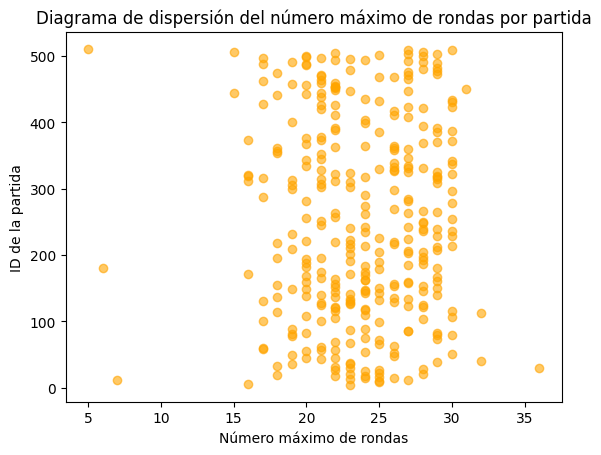

In [ ]:
round_por_match = df.groupby('MatchId')['RoundId'].max().reset_index().sort_values(by='RoundId')

plt.scatter(round_por_match['RoundId'],round_por_match['MatchId'], color='orange', alpha=0.6)


plt.ylabel('ID de la partida')
plt.xlabel('Número máximo de rondas')
plt.title('Diagrama de dispersión del número máximo de rondas por partida')

plt.show()

In [ ]:
df.query('InternalTeamId>0')

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,de_inferno,Terrorist,1,4,1,False,True,False,False,51.120.248.995.704.500,...,0,0,0,0,750,4400,0,0,0,0
1,de_inferno,Terrorist,1,4,1,False,True,False,False,4.348.662.552.266.170,...,0,0,0,0,800,4400,0,0,0,0
2,de_inferno,Terrorist,1,4,1,False,True,False,False,3.735.469.847.054.540,...,0,0,0,0,1000,4400,0,0,0,0
3,de_inferno,Terrorist,1,4,1,False,True,False,False,4.767.886.136.441.470,...,0,0,0,0,850,4400,0,0,0,0
4,de_inferno,Terrorist,1,4,1,False,True,True,False,5.312.251.089.027.310,...,0,0,0,0,1000,4400,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79152,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,340.272.074.099.723,...,0,0,0,0,5600,27100,4,0,2,2
79153,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,2.926.105.436.288.080,...,1,0,1,0,5500,27100,8,5,1,3
79154,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,5.914.717.797.783.930,...,0,0,0,0,4950,27100,5,0,2,3
79155,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,42.582.842.797.783.900,...,0,0,0,0,4950,27100,1,0,1,0


# **Fase 3: Data Preparation**

## Se selecciona las partidas que tengan más de 30 rondas y posteriormente se eliminan.

In [ ]:
rounds_mayores_a_30 = df.loc[df['RoundId'] > 30]

df = df.drop(rounds_mayores_a_30.index)

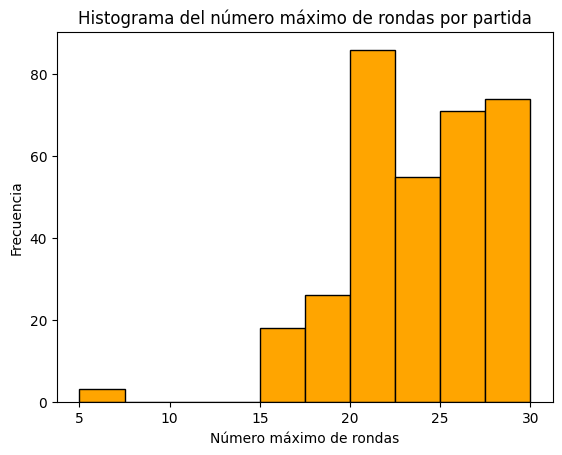

In [ ]:
round_por_match = df.groupby('MatchId')['RoundId'].max().reset_index().sort_values(by='RoundId')

max_rounds = round_por_match['RoundId']

plt.hist(max_rounds, color='orange', edgecolor='black')

plt.xlabel('Número máximo de rondas')
plt.ylabel('Frecuencia')
plt.title('Histograma del número máximo de rondas por partida')

# Mostramos el histograma
plt.show()

## Se elimina la columna AbnormalMatch por su nulo aporte

In [ ]:
df = df.drop('AbnormalMatch', axis=1)

## Se cambia el tipo de dato de la columna RoundWinner a Boolean para mejorar su manipulación

In [ ]:
df['RoundWinner'] = df['RoundWinner'].astype(bool)

## Se modifica la columna 'Team' en función de la ronda y el equipo interno para asignar los valores "Terrorist" y "CounterTerrorist" según el momento del juego

In [ ]:
for partida in df['MatchId'].unique():
    team1 = df[(df['RoundId'] == 1) & (df['InternalTeamId'] == 1) & (df['MatchId'] == partida)]['Team'].unique()[0]
    team2 = df[(df['RoundId'] == 1) & (df['InternalTeamId'] == 2) & (df['MatchId'] == partida)]['Team'].unique()[0]
    rondas = df[(df['MatchId'] == partida)]['RoundId'].unique()
    for ronda in rondas:
        if ronda < 16:
            df.loc[(df['RoundId'] == ronda) & (df['InternalTeamId'] == 1) & (df['MatchId'] == partida), 'Team'] = 'Terrorist'
            df.loc[(df['RoundId'] == ronda) & (df['InternalTeamId'] == 2) & (df['MatchId'] == partida), 'Team'] = 'CounterTerrorist'
        else:
            df.loc[(df['RoundId'] == ronda) & (df['InternalTeamId'] == 1) & (df['MatchId'] == partida), 'Team'] = 'CounterTerrorist'
            df.loc[(df['RoundId'] == ronda) & (df['InternalTeamId'] == 2) & (df['MatchId'] == partida), 'Team'] = 'Terrorist'

### Indicamos qué equipo ganó la partida y el recuento de partidas ganadas por cada equipo y de partidas empatadas.

In [ ]:
partidas_ganadas_equipo1 = 0
partidas_ganadas_equipo2 = 0
partidas_empatadas = 0


for partida in df['MatchId'].unique():
    rondas = df[(df['MatchId'] == partida)]['RoundId'].unique()
    equipo1_rondas_ganadas = len(df[(df['MatchId'] == partida) & (df['InternalTeamId'] == 1) & (df['RoundWinner'] == True)])
    equipo2_rondas_ganadas = len(df[(df['MatchId'] == partida) & (df['InternalTeamId'] == 2) & (df['RoundWinner'] == True)])
    if equipo1_rondas_ganadas > equipo2_rondas_ganadas:
        df.loc[(df['MatchId'] == partida) & (df['InternalTeamId'] == 1), 'MatchWinner'] = True
        df.loc[(df['MatchId'] == partida) & (df['InternalTeamId'] == 2), 'MatchWinner'] = False
        partidas_ganadas_equipo1 += 1
    elif equipo1_rondas_ganadas < equipo2_rondas_ganadas:
        df.loc[(df['MatchId'] == partida) & (df['InternalTeamId'] == 1), 'MatchWinner'] = False
        df.loc[(df['MatchId'] == partida) & (df['InternalTeamId'] == 2), 'MatchWinner'] = True
        partidas_ganadas_equipo2 += 1
    else:
        # En caso de empate en rondas ganadas, dejar datos como nan
        df.loc[df['MatchId'] == partida, 'MatchWinner'] = np.nan
        partidas_empatadas += 1

In [ ]:
print("Partidas ganadas empezando como Terrorist:", partidas_ganadas_equipo1)
print("Partidas ganadas empezando como CounterTerrorist:", partidas_ganadas_equipo2)
print("Partidas empatadas:", partidas_empatadas)

Partidas ganadas empezando como Terrorist: 113
Partidas ganadas empezando como CounterTerrorist: 79
Partidas empatadas: 141


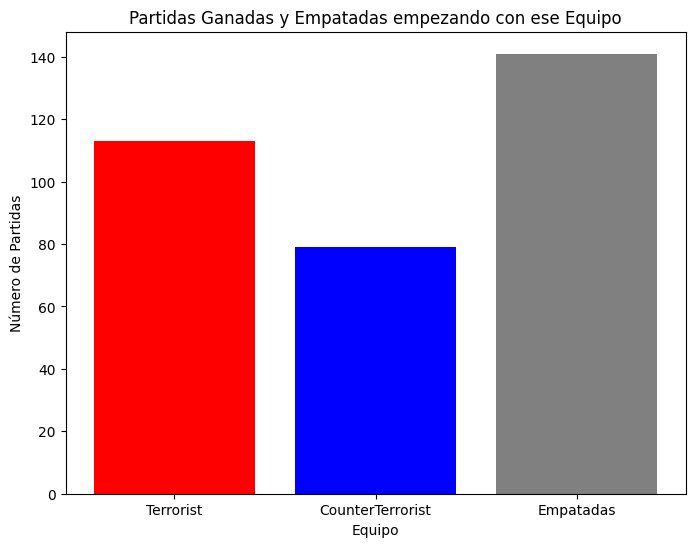

In [ ]:
equipos = ['Terrorist', 'CounterTerrorist', 'Empatadas']
partidas = [partidas_ganadas_equipo1, partidas_ganadas_equipo2, partidas_empatadas]

colores = ['red', 'blue', 'grey']

plt.figure(figsize=(8, 6))
plt.bar(equipos, partidas, color=colores)
plt.title('Partidas Ganadas y Empatadas empezando con ese Equipo')
plt.xlabel('Equipo')
plt.ylabel('Número de Partidas')
plt.show()

### Obtenemos los datos de las partidas donde se gana comenzando como terrorista y counter terrorist

In [ ]:
mapas = df['Map'].unique()

for mapa in mapas:
    partidas_ganadas_equipo1 = 0
    partidas_ganadas_equipo2 = 0
    partidas_empatadas = 0

    # Filtrar el df por el mapa
    df_mapa = df[df['Map'] == mapa]

    for partida in df_mapa['MatchId'].unique():
        rondas = df_mapa[(df_mapa['MatchId'] == partida)]['RoundId'].unique()
        equipo1_rondas_ganadas = len(df_mapa[(df_mapa['MatchId'] == partida) & (df_mapa['InternalTeamId'] == 1) & (df_mapa['RoundWinner'] == True)])
        equipo2_rondas_ganadas = len(df_mapa[(df_mapa['MatchId'] == partida) & (df_mapa['InternalTeamId'] == 2) & (df_mapa['RoundWinner'] == True)])

        if equipo1_rondas_ganadas > equipo2_rondas_ganadas:
            partidas_ganadas_equipo1 += 1
        elif equipo1_rondas_ganadas < equipo2_rondas_ganadas:
            partidas_ganadas_equipo2 += 1
        else:
            partidas_empatadas += 1

    print("Mapa:", mapa)
    print("Partidas ganadas empezando como Terroristas:", partidas_ganadas_equipo1)
    print("Partidas ganadas empezando como CounterTerrorist:", partidas_ganadas_equipo2)
    print("Partidas empatadas:", partidas_empatadas)
    print()

Mapa: de_inferno
Partidas ganadas empezando como Terroristas: 33
Partidas ganadas empezando como CounterTerrorist: 32
Partidas empatadas: 54

Mapa: de_nuke
Partidas ganadas empezando como Terroristas: 22
Partidas ganadas empezando como CounterTerrorist: 16
Partidas empatadas: 13

Mapa: de_mirage
Partidas ganadas empezando como Terroristas: 29
Partidas ganadas empezando como CounterTerrorist: 14
Partidas empatadas: 39

Mapa: de_dust2
Partidas ganadas empezando como Terroristas: 29
Partidas ganadas empezando como CounterTerrorist: 17
Partidas empatadas: 35



### Se grafican las partidas donde se gana comenzando como terrorista y counter terrorist

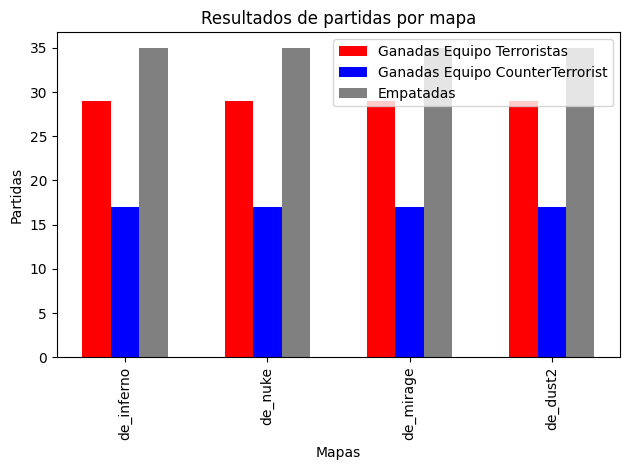

In [ ]:
color_terrorist = 'red'
color_counterterrorist = 'blue'
color_empatadas = 'gray'

x = np.arange(len(mapas))

# Graficar
plt.bar(x - 0.2, partidas_ganadas_equipo1, 0.2, label='Ganadas Equipo Terroristas', color=color_terrorist)
plt.bar(x, partidas_ganadas_equipo2, 0.2, label='Ganadas Equipo CounterTerrorist', color=color_counterterrorist)
plt.bar(x + 0.2, partidas_empatadas, 0.2, label='Empatadas', color=color_empatadas)

plt.xlabel('Mapas')
plt.ylabel('Partidas')
plt.title('Resultados de partidas por mapa')
plt.xticks(x, mapas, rotation='vertical')
plt.legend()
plt.tight_layout()
plt.show()

### Se obtienen los datos de rondas ganadas por equipo y mapa

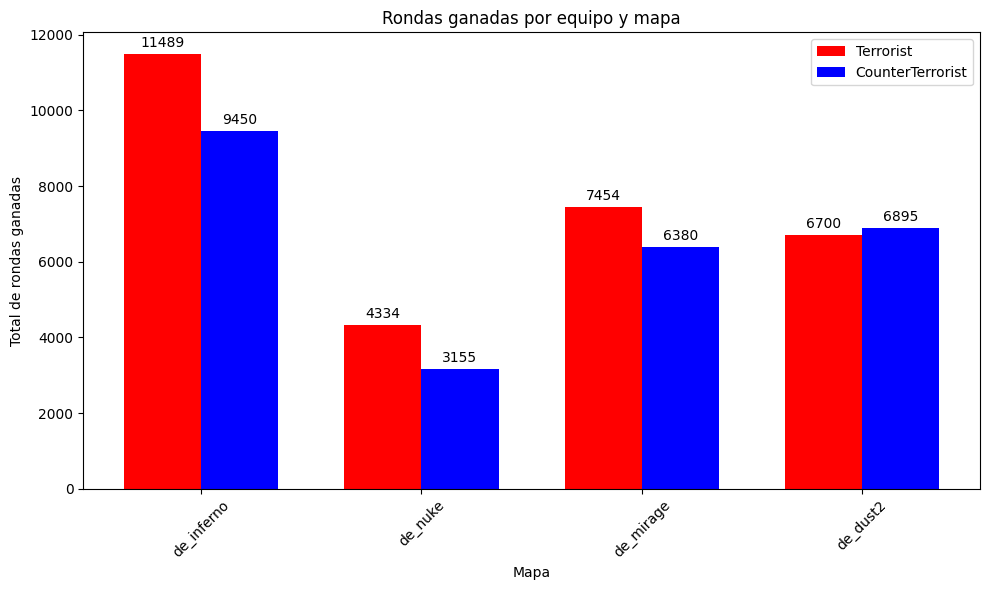

In [ ]:
mapas = df['Map'].unique()
total_rondas_ganadas_terrorist = []
total_rondas_ganadas_counterterrorist = []

# Calcular el total de rondas ganadas por equipo por mapa
for mapa in mapas:
    df_mapa = df[df['Map'] == mapa]
    total_rondas_ganadas_terrorist.append(df_mapa[df_mapa['Team'] == 'Terrorist']['RoundWinner'].sum())
    total_rondas_ganadas_counterterrorist.append(df_mapa[df_mapa['Team'] == 'CounterTerrorist']['RoundWinner'].sum())

x = np.arange(len(mapas))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, total_rondas_ganadas_terrorist, width, label='Terrorist', color='red')
bar2 = ax.bar(x + width/2, total_rondas_ganadas_counterterrorist, width, label='CounterTerrorist', color='blue')

for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.set_xlabel('Mapa')
ax.set_ylabel('Total de rondas ganadas')
ax.set_title('Rondas ganadas por equipo y mapa')
ax.set_xticks(x)
ax.set_xticklabels(mapas, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

### Muestra el gráfico de las kills realizadas por partidas de los jugadores.

/tmp/ipykernel_108/1221479229.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df.MatchKills)


<Axes: xlabel='MatchKills', ylabel='Density'>

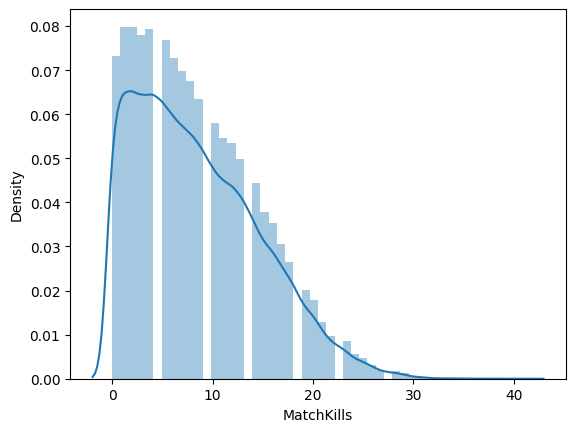

In [ ]:
sb.distplot(df.MatchKills)

### Impacto de las estadísticas individuales en el resultado del juego

In [ ]:
df_filtrado = df.query('RoundKills > 0 and RoundAssists > 0')
resultados = df_filtrado.groupby(['Team', 'RoundWinner']).agg(
    total_kills=('RoundKills', 'sum'),         # Sumamos las kills por grupo
    total_assists=('RoundAssists', 'sum'),     # Sumamos las asistencias por grupo
    count_wins=('RoundWinner', 'count')        # Contamos cuántas veces cada equipo ha ganado
)

# Mostramos el resultado
print(resultados)

                              total_kills  total_assists  count_wins
Team             RoundWinner                                        
CounterTerrorist False               2124           1645        1476
                 True                2161           1709        1564
Terrorist        False                942            749         705
                 True                1420           1129        1073


# Fase 4 y 5: Modelamiento y evaluación

### Para saber si el valor de equipamiento inicial tiene una relación con la cantidad de asesinatos por ronda, utilizaremos el modelo de Regresión lineal simple, ya que modelaremos dos variables continuas.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Seleccionar las características relevantes
carac = ['RoundStartingEquipmentValue'] 
objetivo = 'RoundKills'

# Separar las características (X) y la variable objetivo (y)
X = df_filtrado[carac]
y = df_filtrado[objetivo]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones 
y_pred = model.predict(X_test)




### Predicción

In [ ]:
y_pred = model.predict(X_test)

### Evaluación Regresión lineal

MSE: 0.3872199301877005


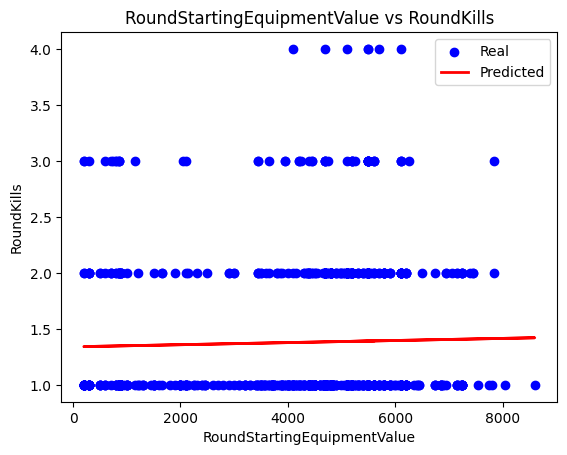

In [ ]:
# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)


print("MSE:", mse)

# Graficar resultados
plt.scatter(X_test, y_test, color='blue', label='Real')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('RoundStartingEquipmentValue vs RoundKills')
plt.xlabel('RoundStartingEquipmentValue')
plt.ylabel('RoundKills')
plt.legend()
plt.show()

El MSE indica un mejor ajuste del modelo a los datos. En este caso, 0.387 en promedio, el error al cuadrado entre los valores reales y predichos es aproximadamente 0.387

<hr>

# Modelo de regresión lineal Multiple

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.utils import resample

### Preparación de datos

A comparación del modelo de regresión Logistica, acá selecionamos mas variables para obtener una mayor predicción, las cuales son : 'RoundKills', 'Survived', Donde la variable 'Survived' es boleano y lo transformamos a binario, al igual que 'RoundWinner'.

In [ ]:
# Seleccionar las columnas relevantes incluyendo 'RoundKills' y 'Survived'
datosUtilizar = df[['Map', 'Team', 'RoundWinner', 'RoundKills', 'Survived']].copy()

# Convertir la columna 'RoundWinner' en valores binarios (0 y 1)
datosUtilizar['RoundWinner'] = datosUtilizar['RoundWinner'].astype(int)

# Convertir la columna 'Survived' en valores binarios (0 y 1)
datosUtilizar['Survived'] = datosUtilizar['Survived'].astype(int)

Convertir columnas categóricas en variables dummy y  Verificar el balance de clases

In [ ]:
data_dummies = pd.get_dummies(datosUtilizar, columns=['Map', 'Team'], drop_first=True)

class_counts = data_dummies['RoundWinner'].value_counts()
print("Distribución de clases:\n", class_counts)

Distribución de clases:
 RoundWinner
1    55857
0    23190
Name: count, dtype: int64


Separa y sobremuestra las clases mayoritaria y minoritaria

In [ ]:
# Separar la clase mayoritaria y la clase minoritaria
data_majority = data_dummies[data_dummies['RoundWinner'] == 1]
data_minority = data_dummies[data_dummies['RoundWinner'] == 0]

# Sobremuestrear la clase minoritaria
data_minority_upsampled = resample(data_minority,
                                   replace=True,  # muestra con reemplazo
                                   n_samples=len(data_majority),  # para igualar a la clase mayoritaria
                                   random_state=42)  # para reproducibilidad
# Combinar la clase mayoritaria y la clase minoritaria sobremuestreada
data_balanced = pd.concat([data_majority, data_minority_upsampled])

### Modelamiento

In [ ]:
# Verificar la nueva distribución de clases
print("Distribución de clases después del sobremuestreo:\n", data_balanced['RoundWinner'].value_counts())

# Separar características y variable objetivo
X = data_balanced.drop('RoundWinner', axis=1)
y = data_balanced['RoundWinner']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

Distribución de clases después del sobremuestreo:
 RoundWinner
1    55857
0    55857
Name: count, dtype: int64


LinearRegression()

### Predicción y evaluación del modelo

MSE: 0.227455401523094
R^2: 0.09011190154757842


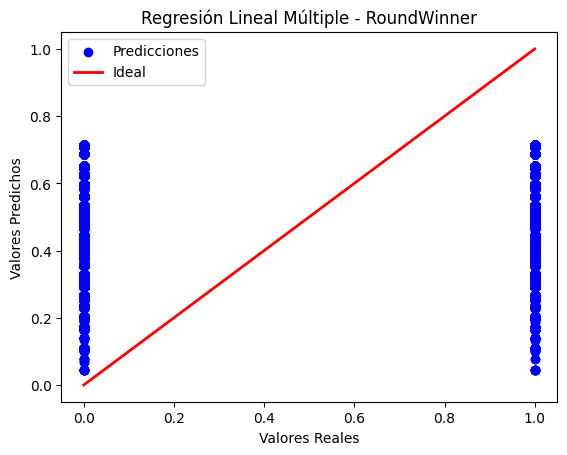

In [ ]:
# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R^2:", r2)

# Graficar resultados
plt.scatter(y_test, y_pred, color='blue', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Ideal')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Regresión Lineal Múltiple - RoundWinner')
plt.legend()
plt.show()



Existe un desbalance de datos a la hora de saber las rondas ganadas y perdidas:
RoundWinner 1 (Ganadores): Hay 55,857 rondas ganadas.
RoundWinner 0 (Perdedores): Hay 23,190 rondas perdidas.
Con más del doble de rondas ganadas comparado con las perdidas.

Por lo que realizamos un sobremuestreo sobre la cantida de rondas ganadas, para así balancear las rondas, quedando de la siguiente manera:
RoundWinner 1 (Ganadores): 55,857 rondas ganadas.
RoundWinner 0 (Perdedores): 55,857 rondas perdidas.
Después del sobremuestreo, las clases están equilibradas, con igual número de rondas ganadas y perdidas. Esto debería ayudar a que el modelo no esté sesgado hacia una de las clases.

# Precisión
Un MSE de 0.227 es un valor que necesita contexto para evaluar si es bueno o malo. En este caso, dado que la variable objetivo es binaria (0 o 1), un MSE cercano a 0 es lo deseable, ya que indica que las predicciones están cerca de los valores reales. Sin embargo, 0.227 puede ser indicativo de un modelo que no está prediciendo con gran precisión.

Un R² de 0.0901 es bastante bajo, lo que indica que el modelo no está explicando bien la variabilidad de la variable objetivo. Un valor tan bajo sugiere que el modelo de regresión lineal múltiple no es adecuado para predecir RoundWinner con las variables actuales, o que hay otros factores importantes no incluidos en el modelo.



# Arbol de desición

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Preparación de datos
Selecciona las columnas y transforma las columnas 'RoundWinner' y 'Survived' en valores Binearios (0 y 1)

In [ ]:

# Seleccionar las columnas relevantes incluyendo 'RoundKills' y 'Survived'
datosUtilizar = df[['Map', 'Team', 'RoundWinner', 'RoundKills', 'Survived']].copy()

# Convertir las columnas 'RoundWinner' y 'Survived' en valores binarios (0 y 1)
datosUtilizar['RoundWinner'] = datosUtilizar['RoundWinner'].astype(int)
datosUtilizar['Survived'] = datosUtilizar['Survived'].astype(int)

# Convertir columnas categóricas en variables dummy
data_dummies = pd.get_dummies(datosUtilizar, columns=['Map', 'Team'], drop_first=True)

# Verificar el balance de clases
class_counts = data_dummies['RoundWinner'].value_counts()
print("Distribución de clases:\n", class_counts)

# Separar características y variable objetivo
X = data_dummies.drop('RoundWinner', axis=1)
y = data_dummies['RoundWinner']

print("Distribución de clases después del sobremuestreo:\n", data_balanced['RoundWinner'].value_counts())

Distribución de clases:
 RoundWinner
1    55857
0    23190
Name: count, dtype: int64
Distribución de clases después del sobremuestreo:
 RoundWinner
1    55857
0    55857
Name: count, dtype: int64


Divide los datos y los entrena 

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de árbol de decisiones
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Realiza la predicción y evalúa el modelo

Precisión del modelo de Árbol de Decisiones: 0.7143580012650221
Matriz de confusión:
 [[  658  3990]
 [  526 10636]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.56      0.14      0.23      4648
           1       0.73      0.95      0.82     11162

    accuracy                           0.71     15810
   macro avg       0.64      0.55      0.53     15810
weighted avg       0.68      0.71      0.65     15810



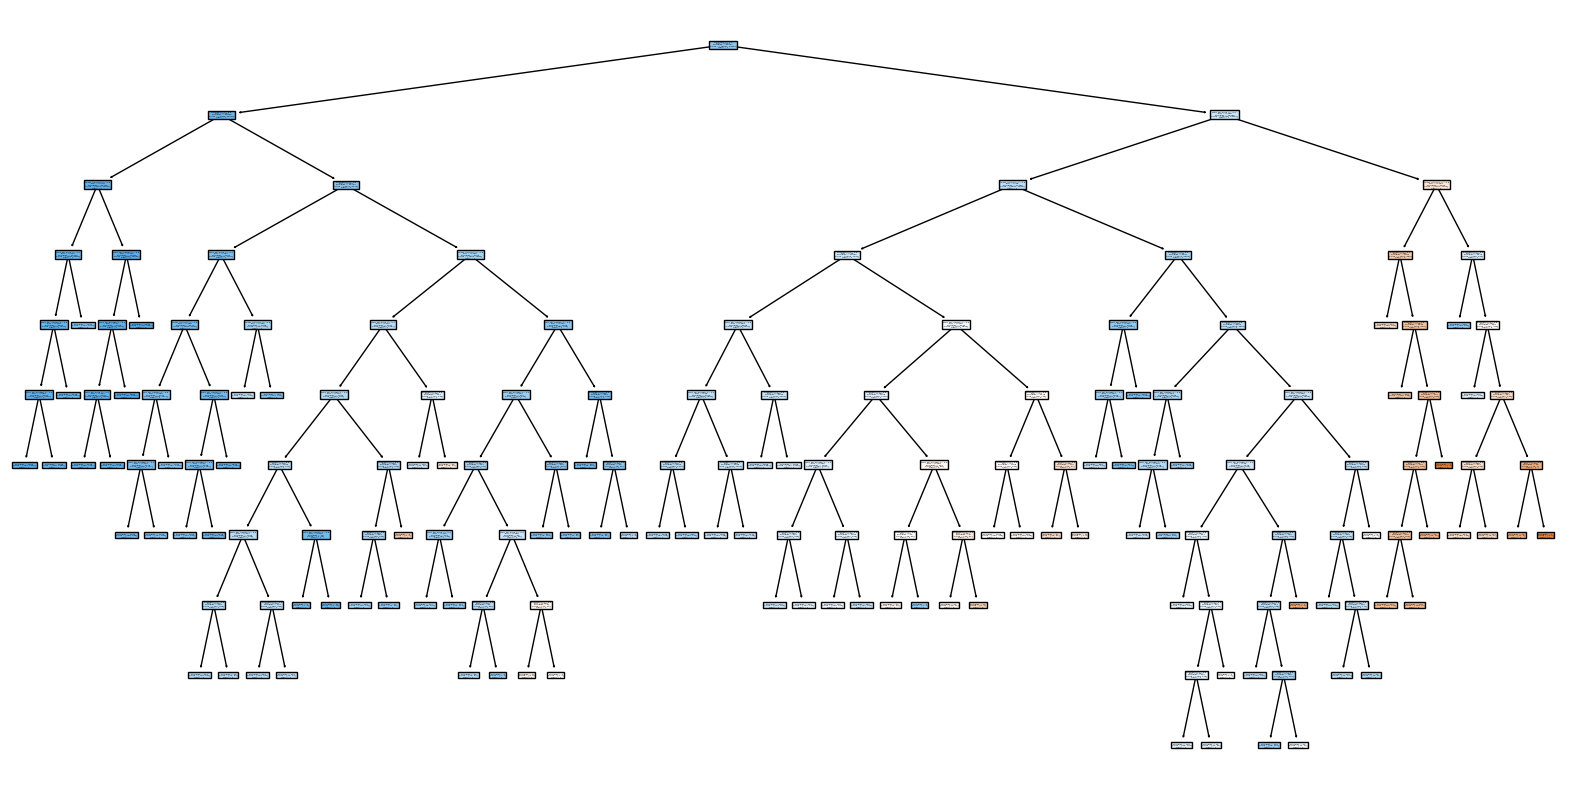

In [ ]:
# Realizar predicciones
y_pred = tree_model.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Precisión del modelo de Árbol de Decisiones:", accuracy)
print("Matriz de confusión:\n", conf_matrix)
print("Reporte de clasificación:\n", class_report)

# Visualización del árbol de decisiones (opcional)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(tree_model, feature_names=X.columns, class_names=['0', '1'], filled=True)
plt.show()


# Precisión General de los 3 modelos


## Regresión Lineal Simple:

El MSE alto (0.387) indica que el modelo tiene un error significativo en sus predicciones.
No se puede medir la precisión directamente, pero el alto MSE sugiere que el modelo no es muy preciso.


## Regresión Lineal Múltiple:

MSE más bajo (0.227) que la regresión lineal simple, indicando un mejor ajuste.
Sin embargo, el bajo R² (0.09) muestra que el modelo no captura bien la variabilidad en los datos.
Árbol de Decisión:

## Regresión Logística:

Precisión Global: 0.59
Mejor en predecir derrotas (20% de recall) en comparación con el árbol de decisión.
Buen desempeño en predecir victorias (91% de recall).
F1-score: 0.71 para victorias, indicando un buen balance entre precisión y recall.

## Árbol de decisión:

La precisión global del 71% es la más alta entre los modelos considerados.
Aunque tiene una baja capacidad para predecir derrotas (14% de recall), es excelente para predecir victorias (95% de recall).
El F1-score alto para las victorias (0.82) indica un buen balance entre precisión y recall en esta clase.

# Conclusión

El modelo de árbol de decisiones es el más preciso de los cuatro modelos analizados.

Aunque el modelo de regresión logística también tiene un buen rendimiento (especialmente en predecir derrotas mejor que el árbol de decisión), su precisión global es menor (59%). La regresión lineal múltiple, aunque tiene un MSE más bajo, no proporciona tanta información sobre la precisión de las predicciones comparada con el árbol de decisiones y la regresión logística.

En resumen, el árbol de decisiones es el mejor modelo para predecir la probabilidad de victoria por equipo en un mapa específico, considerando su alta precisión global y excelente desempeño en la predicción de victorias.









# Modelo de clasificación:

# Se preparan los datos que utilizaremos en el siguiente modelo, seleccionamos las columnas relevantes y convertimos RoundWinner a binario.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Limpieza de datos numéricos 
def limpiar(column):
    return pd.to_numeric(column.str.replace('.', '', regex=True), errors='coerce')

# Seleccionar las columnas relevantes
datosUtilizar = df_filtrado[['Map', 'Team', 'RoundWinner']].copy()

# Convertir la columna 'RoundWinner' en valores binarios 
datosUtilizar['RoundWinner'] = datosUtilizar['RoundWinner'].astype(int)

# Convertir columnas categóricas en variables dummy
data_dummies = pd.get_dummies(datosUtilizar, columns=['Map', 'Team'], drop_first=True)

# Utilizaremos regresión logística, ya que es el más adecuado para nuestro problema de negocio ya que utilizamos variables binarias

In [ ]:
# Separar características y variable objetivo
X = data_dummies.drop('RoundWinner', axis=1)
y = data_dummies['RoundWinner']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ajustar el modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Predicción

In [ ]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

### Evaluar modelo

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Precisión: {accuracy}')
print(f'Matriz de confusión: \n{conf_matrix}')
print(f'Reporte de clasificación: \n{class_report}')

Precisión: 0.5899031811894883
Matriz de confusión: 
[[127 520]
 [ 73 726]]
Reporte de clasificación: 
              precision    recall  f1-score   support

           0       0.64      0.20      0.30       647
           1       0.58      0.91      0.71       799

    accuracy                           0.59      1446
   macro avg       0.61      0.55      0.50      1446
weighted avg       0.61      0.59      0.53      1446



### Predicción con nuevo conjunto de datos

In [ ]:
# Predecir la probabilidad de victoria en un nuevo conjunto de datos
DatosPredic = pd.DataFrame({
    'Map': ['de_dust2'],  # Reemplazar con el mapa deseado
    'Team': ['Terrorist'],  # Reemplazar con el equipo deseado
    'RLethalGrenadesThrown': [10],  # Reemplazar con las estadísticas reales
    'RNonLethalGrenadesThrown': [5],
    'PrimaryAssaultRifle': [2.5],
    'PrimarySniperRifle': [1.0],
    'PrimaryHeavy': [0.5],
    'PrimarySMG': [3.0],
    'PrimaryPistol': [1],
    'RoundKills': [15],
    'RoundAssists': [3],
    'RoundHeadshots': [5],
    'RoundFlankKills': [2],
    'RoundStartingEquipmentValue': [8000],
    'TeamStartingEquipmentValue': [40000]
})

### Evaluación del modelo con nuevos datos

In [ ]:
# Convertir las columnas categóricas en variables dummy
new_data_dummies = pd.get_dummies(DatosPredic, columns=['Map', 'Team'], drop_first=True)

# Asegurarse de que las columnas coinciden con las del modelo entrenado
missing_cols = set(X_train.columns) - set(new_data_dummies.columns)
for col in missing_cols:
    new_data_dummies[col] = 0
new_data_dummies = new_data_dummies[X_train.columns]

# Predecir la probabilidad
probabilidad_predic = model.predict_proba(new_data_dummies)[:, 1]
print(f'Predicción probabilidad de victoria: {probabilidad_predic[0]}')


Predicción probabilidad de victoria: 0.5311452711670359


# Precisión
El modelo predijo correctamente aproximadamente el 59% de los casos
# Matriz de confusión
Verdaderos Negativos (TN): 127
Estos son los casos en los que la clase real era 0 y el modelo también predijo 0 correctamente.
Falsos Positivos (FP): 520
Estos son los casos en los que la clase real era 0, pero el modelo predijo 1 incorrectamente.
Falsos Negativos (FN): 73
Estos son los casos en los que la clase real era 1, pero el modelo predijo 0 incorrectamente.
Verdaderos Positivos (TP): 726
Estos son los casos en los que la clase real era 1 y el modelo también predijo 1 correctamente.
# Probabilidad de de victoria
Según el modelo hay aproximadamente un 53% de probabilidad de victoria

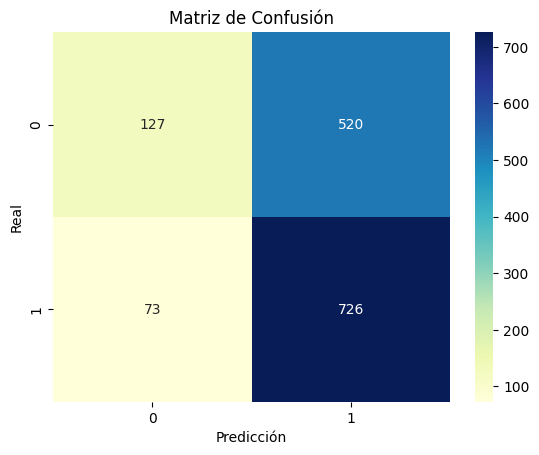

In [ ]:
sb.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Para conocer la probabilidad de victoria por equipo en un mapa específico utilizaremos Random forest

### Primero, Importamos lo necesario y hacemos una copia del dataframe para evitar futuras eliminaciones de columnas por accidente

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df_filtrado_copy = df_filtrado.copy()

### Se eliminan filas con valores nulos

In [ ]:
df_filtrado_copy = df_filtrado_copy.dropna(subset=['MatchWinner'])

### Seleccionamos columnas relevantes y verificamos si la columna map existe

In [ ]:
relevant_columns = ['RoundKills', 'RoundAssists', 'RoundId', 'InternalTeamId', 'Map', 'MatchWinner']
df_filtrado_copy = df_filtrado_copy[relevant_columns]

if 'Map' not in df_filtrado_copy.columns:
    raise KeyError("La columna 'Map' no existe en el dataframe")

### Se convierte Map a variable dummy y MatchWinner a una variable binaria

In [ ]:
df_filtrado_copy = pd.get_dummies(df_filtrado_copy, columns=['Map'])

le = LabelEncoder()
df_filtrado_copy['MatchWinner'] = le.fit_transform(df_filtrado_copy['MatchWinner'])

### Se separa por carácteristicas y varible objetivo

In [ ]:
features = df_filtrado_copy.drop(['MatchWinner', 'RoundId'], axis=1)
target = df_filtrado_copy['MatchWinner']

### División de los datos en conjunto de prueba y entrenamiento, posteriormente se inicializa y entrena el modelo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Se realizan las predicciones con el conjunto de prueba y se evalua el modelo

In [ ]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

precision = accuracy_score(y_test, y_pred)
matriz_confu = confusion_matrix(y_test, y_pred)
clas_report = classification_report(y_test, y_pred)

print("Precisión:", precision)
print("Matriz de confusión:\n", matriz_confu)
print("Reporte de clasificación:\n", clas_report)

print("Probabilidades de victoria (predichas):", y_pred_proba[:10])

Precisión: 0.5621621621621622
Matriz de confusión:
 [[249  80]
 [163  63]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.60      0.76      0.67       329
           1       0.44      0.28      0.34       226

    accuracy                           0.56       555
   macro avg       0.52      0.52      0.51       555
weighted avg       0.54      0.56      0.54       555

Probabilidades de victoria (predichas): [0.27953186 0.39617951 0.52848644 0.50265149 0.44956888 0.00214286
 0.52379128 0.55411863 0.39617951 0.50265149]


### Reporte de clasificación:

Clase 0:
Precision: 0.60 - El 60% de las predicciones de clase 0 son correctas.
Recall: 0.76 - El 76% de los verdaderos ejemplos de clase 0 se han identificado correctamente.
F1-score: 0.67 - La media armónica de precision y recall para la clase 0.
Support: 329 - Número de ocurrencias de la clase 0 en el conjunto de datos.
Clase 1:
Precision: 0.44 - El 44% de las predicciones de clase 1 son correctas.
Recall: 0.28 - El 28% de los verdaderos ejemplos de clase 1 se han identificado correctamente.
F1-score: 0.34 - La media armónica de precision y recall para la clase 1.
Support: 226 - Número de ocurrencias de la clase 1 en el conjunto de datos.

### Probabilidad:

Probabilidades de victoria predichas : [0.27953186, 0.39617951, 0.52848644, 0.50265149, 0.44956888, 0.00214286, 0.52379128, 0.55411863, 0.39617951, 0.50265149]
Esto muestra las probabilidades predichas por el modelo para cada ejemplo de pertenecer a la clase 1. Por ejemplo, el primer valor 0.27953186 indica que el modelo estima una probabilidad de aproximadamente 28% de que el primer ejemplo pertenezca a la clase 1.

### El modelo tiene un precisión del 56.2%, lo que se considera moderadamente preciso, en cuanto al desempeño por clase, la clase 0 tiene mejor rendimiento que la clase 1 en términos de precisión, por lo tanto, el modelo es mejor identificando la clase 0.

## Se gráfica utilizando la curva ROC

### Se obtienen las probabilidades predichas anteriormente

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
y_pred_proba = model.predict_proba(X_test)[:, 1]

### Se calcula la cruva ROC y el AUC

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

### Se grafica la curva ROC

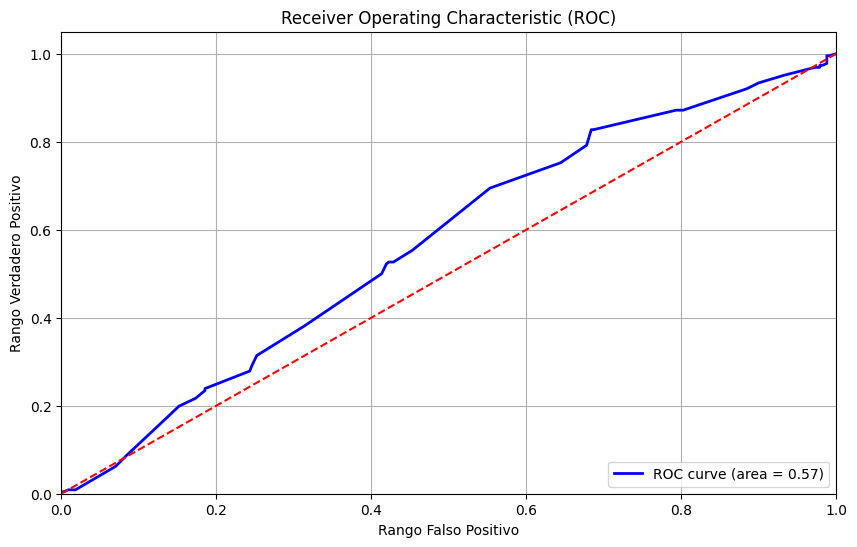

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Rango Falso Positivo')
plt.ylabel('Rango Verdadero Positivo')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Se muestra un AUC  de 0.57, lo cual indica que el modelo tiene una capacidad moderada para distinguir entre las clases. Una AUC de 0.5 indica un modelo que no es mejor que adivinar al azar, mientras que una AUC de 1.0 indica un modelo perfecto. Aquí, 0.57 sugiere que hay espacio para mejorar.

## Mejora de precisión utilizando GridSearch

### Definimos lo parámetro a ajustar

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

### Inicializamos el modelo e iniciamos la búsqueda de los parámetros

In [ ]:
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

### Ajustamos el modelo y obtener el mejor encontrado por GridSearch

In [ ]:
grid_search.fit(X_train, y_train)

mejor_modelo = grid_search.best_estimator_

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; tota

### Se evalua el mejor modelo encontrado por GridSearch

In [ ]:
y_pred_best = mejor_modelo.predict(X_test)
y_pred_proba_best = mejor_modelo.predict_proba(X_test)[:, 1]

precision_mejor = accuracy_score(y_test, y_pred_best)
matriz_confu_mejor = confusion_matrix(y_test, y_pred_best)
clas_report_mejor = classification_report(y_test, y_pred_best)

print("Mejor precisión:", precision_mejor)
print("Mejor matriz de confusión:\n", matriz_confu_mejor)
print("Mejor reporte de clasificación:\n", clas_report_mejor)


Mejor precisión: 0.5711711711711712
Mejor matriz de confusión:
 [[255  74]
 [164  62]]
Mejor reporte de clasificación:
               precision    recall  f1-score   support

           0       0.61      0.78      0.68       329
           1       0.46      0.27      0.34       226

    accuracy                           0.57       555
   macro avg       0.53      0.52      0.51       555
weighted avg       0.55      0.57      0.54       555



### Matriz de confusión

Clase 0:

Precisión: 0.61 (el 61% fueron correctas)
Recall: 0.78 (el 78% fueron correctamente predichas)

Clase 1:

Precisión: 0.46 (el 46% fueron correctas)
Recall: 0.27 (el 27% fueron correctamente predichas)

### Precisión vs Recall:

### La precisión es mayor para la clase 0, lo que nos da entender que cuando el modelo predice una derrota, es más probable que sea correcto. También, el recall para la clase 1 es bajo, lo que indica que el modelo no está capturando muchas de las verdaderas victorias.

### El modelo tiene una precisión del 0.57 (57%), lo que significa que el modelo predijo correctamente el 57% de las veces. Mejoró en un 0,8%.

# Mejorar usando Cross validation con 5 pliegues

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
cv_scores = cross_val_score(model, features, target, cv=5)
print("Puntuaciones de validación cruzada:", cv_scores)
print("Media de validación cruzada:", cv_scores.mean())

Puntuaciones de validación cruzada: [0.56576577 0.47833935 0.59205776 0.55234657 0.61371841]
Media de validación cruzada: 0.5604455719257163


### Creamos un DataFrame con los resultados de la validación cruzada

In [ ]:
cv_results = pd.DataFrame(cv_scores, columns=['Scores'])

### Se grafica la validación cruzada

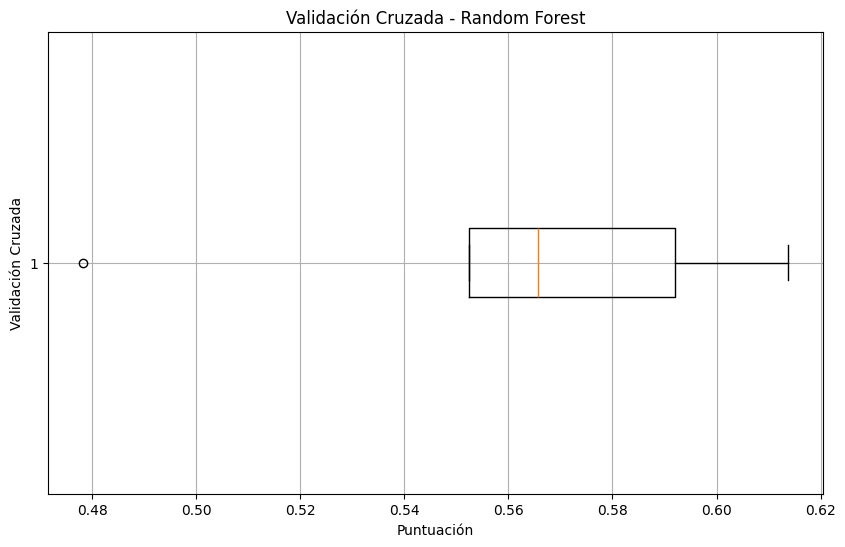

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(cv_results['Scores'], vert=False)
plt.title('Validación Cruzada - Random Forest')
plt.xlabel('Puntuación')
plt.ylabel('Validación Cruzada')
plt.grid(True)
plt.show()

### Se obtiene que media de las puntuaciones de validación cruzada es de aproximadamente 0.5604 (56.04%). Por lo que no mejora el primer modelo.

# K- Nearest Neighbor

Se Importa los Sklearn, se seleccionan las columnas relevantes, Se convierte columna 'RoundWinner' en valores binarios (0 y 1) y se convierten las columnas categóricas en variables Dummy

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns

datosUtilizar = df[['Map', 'Team', 'RoundWinner', 'RoundKills']].copy()

Se convierte columna 'RoundWinner' en valores binarios (0 y 1) y se convierten las columnas categóricas en variables Dummy

In [ ]:
datosUtilizar['RoundWinner'] = datosUtilizar['RoundWinner'].astype(int)


data_dummies = pd.get_dummies(datosUtilizar, columns=['Map', 'Team'], drop_first=True)

 Verificar el balance de clases y Separar la clase mayoritaria y la clase minoritaria

In [ ]:

class_counts = data_dummies['RoundWinner'].value_counts()
print("Distribución de clases:\n", class_counts)

data_majority = data_dummies[data_dummies['RoundWinner'] == 1]
data_minority = data_dummies[data_dummies['RoundWinner'] == 0]

Distribución de clases:
 RoundWinner
1    55857
0    23190
Name: count, dtype: int64


Sobremuestrear la clase minoritaria y Combina la clase mayoritaria y la clase minoritaria sobremuestreada

In [ ]:
data_minority_upsampled = resample(data_minority,
                                   replace=True,  # muestra con reemplazo
                                   n_samples=len(data_majority),  # para igualar a la clase mayoritaria
                                   random_state=42)  # para reproducibilidad

data_balanced = pd.concat([data_majority, data_minority_upsampled])

Verificar la nueva distribución de clases y Separar características y variable objetivo

In [ ]:
print("Distribución de clases después del sobremuestreo:\n", data_balanced['RoundWinner'].value_counts())

X = data_balanced.drop('RoundWinner', axis=1)
y = data_balanced['RoundWinner']

Distribución de clases después del sobremuestreo:
 RoundWinner
1    55857
0    55857
Name: count, dtype: int64


Divide los datos en conjuntos de entrenamiento y prueba, y Ajustar el modelo KNN

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar el número de vecinos (k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

 Realizar predicciones

In [ ]:
y_pred = knn.predict(X_test)

# Evaluación del modelo y matriz de confusión

Accuracy: 0.5902967372331379
Confusion Matrix: 
[[6499 4577]
 [4577 6690]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.59      0.59      0.59     11076
           1       0.59      0.59      0.59     11267

    accuracy                           0.59     22343
   macro avg       0.59      0.59      0.59     22343
weighted avg       0.59      0.59      0.59     22343



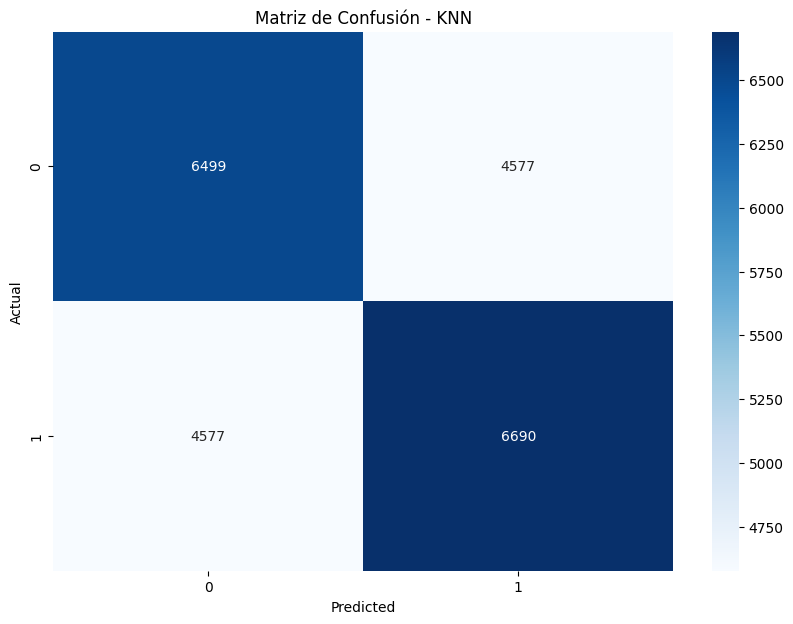

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix: \n{conf_matrix}')
print(f'Classification Report: \n{class_report}')

# Grafica
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Resultados

La precisión (accuracy) del modelo es aproximadamente 0.59. Esto significa que el modelo KNN clasifica correctamente aproximadamente el 59% de las rondas.

La matriz de confusión muestra el rendimiento del modelo en términos de verdaderos positivos (TP), falsos positivos (FP), verdaderos negativos (TN) y falsos negativos (FN):

True Negatives (TN): 6499 (el modelo predijo 0 correctamente)
False Positives (FP): 4577 (el modelo predijo 1 pero era 0)
False Negatives (FN): 4577 (el modelo predijo 0 pero era 1)
True Positives (TP): 6690 (el modelo predijo 1 correctamente)

Conclusiones
Balanced Performance: El modelo tiene un rendimiento equilibrado entre ambas clases con precisión, recall y F1-score todos en 0.59. Esto sugiere que el modelo no está sesgado hacia una clase en particular.
Moderate Accuracy: Una precisión de 59% indica que el modelo tiene un rendimiento moderado y hay espacio para mejoras.
Potential for Improvement: Dado el rendimiento moderado del modelo, se podría considerar ajustar los hiperparámetros del KNN, probar diferentes números de vecinos, o explorar características adicionales para mejorar el rendimiento. También se podría considerar el uso de técnicas de ingeniería de características o la implementación de otros modelos de clasificación más complejos, como SVM o ensambles, para ver si se obtiene un mejor rendimiento.

# Conclusión

## Modelos evaluados:

### Regresión Logística

Precisión: 59%
Matriz de Confusión:
Verdaderos Negativos (TN): 127
Falsos Positivos (FP): 520
Falsos Negativos (FN): 73
Verdaderos Positivos (TP): 726
Probabilidad de Victoria: Aproximadamente 53%

### Random forest

Precisión Global: 56.2%
Reporte de Clasificación:
Clase 0:
Precisión: 0.60
Recall: 0.76
F1-score: 0.67
Support: 329
Clase 1:
Precisión: 0.44
Recall: 0.28
F1-score: 0.34
Support: 226
Probabilidades de Victoria Predichas: Varían entre 0.002 y 0.554

### K-Nearest Neighbors (KNN)

Precisión Global: 59%
Matriz de Confusión:
Verdaderos Negativos (TN): 6499
Falsos Positivos (FP): 4577
Falsos Negativos (FN): 4577
Verdaderos Positivos (TP): 6690

# Interpretación

### La regresión logística una precisión de 59%, esto indica que el modelo predijo correctamente el 59% de los casos.
Desempeño: Tiene un alto número de falsos positivos (520) y un número significativo de verdaderos positivos (726), lo que sugiere que el modelo tiende a predecir la clase 1 con más frecuencia, incluso cuando no es correcto.
Probabilidad de Victoria: La probabilidad predicha del 53% indica una ligera tendencia a predecir una victoria.

### Random Forest
Precisión Global: La precisión del 56.2% es moderadamente precisa.
Desempeño por Clase:
La clase 0 tiene un rendimiento decente con una precisión del 60% y un recall del 76%.
La clase 1 tiene un rendimiento pobre con una precisión del 44% y un recall del 28%.

### K-Nearest Neighbors (KNN)
Tiene una precisión del 59% es comparable a la de la regresión logística.
La Matriz de Confusión muestra un gran número de verdaderos negativos y verdaderos positivos, pero también un número significativo de falsos positivos y falsos negativos, lo que sugiere un rendimiento equilibrado pero no óptimo.

## Resumen General de Resultados

### Regresión Logística: Ofrece una precisión decente y un manejo controlado de falsos negativos, siendo más fácil de interpretar.
Random Forest: Aunque ofrece un rendimiento decente en la clase 0, su rendimiento en la clase 1 es deficiente.
K-Nearest Neighbors: Ofrece un rendimiento equilibrado, pero con una precisión general que iguala la de la regresión logística sin ofrecer ventajas significativas adicionales.

### En conclusión, aunque la precisión es igual a la de KNN (59%), la regresión logística tiene una mejor precisión en términos de verdaderos positivos y un manejo más controlado de los falsos negativos. 

# Fase 6: Deployment

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ee28c4dd-4849-4350-a8a0-4b796b88f263' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>